In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy
from ISLP import load_data
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA,QuadraticDiscriminantAnalysis as QDA)
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML




In [ ]:
market = load_data('Smarket')
market.columns
smarket=market.drop('Direction', axis=1)
correlation=smarket.corr()
print(correlation[correlation>0.5])
plt.scatter( market['Year'],market['Volume'])
plt.show()
smarket.plot(y='Volume')
print(help(smf.logit))

In [222]:
print(market.columns)
x= market.drop(['Direction','Today','Year'], axis=1)
y= market['Direction'].map({'Up': 1,'Down':0})
y= y.astype(int)
df = pd.concat([x,y],axis=1)
df= pd.DataFrame(df)

formula = 'Direction ~ '+' + '.join(x.columns)
print(formula)


logit1= smf.logit(formula, data=df).fit()
x=sm.add_constant(x)
logit2= sm.GLM(y,x, family=sm.families.Binomial()).fit()
# print(logit1.summary(),logit2.summary())
# f no data set is supplied to the predict() function, then the probabilities 
# are computed for the train-ing data that was used to fit the logistic regression model.
probs=logit2.get_prediction(x).summary_frame(0.05)
# print(probs)
probs['direction_pred']=np.where(probs['mean']>0.5,1,0)
probs['direction_pred'].astype(int)
# confusion matrix(actual, predicted)
confusion_matrix= pd.crosstab(market['Direction'],probs['direction_pred'])
print(confusion_matrix.T)
np.mean(y == probs['direction_pred'])


Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')
Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume
Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
Direction       Down   Up
direction_pred           
0                145  141
1                457  507


0.5216

In [203]:
# Split the data into training and testing sets

test_data1= np.where(market['Year'] >= 2005)[0]

test_data1.shape
type(test_data1)
market.index
# this approcah works for 1D array
market.iloc[test_data1].head()

# ~ only works for boolean data or numerical data
test_data = market.iloc[~train_data]
print(test_data.head())


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
998,2005,-0.134,0.008,-0.007,0.715,-0.431,0.7869,-0.812,Down
999,2005,-0.812,-0.134,0.008,-0.007,0.715,1.5108,-1.167,Down
1000,2005,-1.167,-0.812,-0.134,0.008,-0.007,1.7210,-0.363,Down
1001,2005,-0.363,-1.167,-0.812,-0.134,0.008,1.7389,0.351,Up
1002,2005,0.351,-0.363,-1.167,-0.812,-0.134,1.5691,-0.143,Down


In [281]:
# splitting the data into training and testing sets
df['Year'] = market['Year']
print(df)

train_data= df[df['Year'] < 2005]
test_data= df[df['Year'] >= 2005]

train_y, train_x = train_data['Direction'], train_data.drop(['Direction','Year'], axis=1)
test_y, test_x = test_data['Direction'], test_data.drop(['Direction','Year'], axis=1)

# fitting the model
logit3 = smf.logit(formula, data=train_data).fit()
logit3.summary()

# predicting the test data
pred2=logit3.predict(test_x)
pred2['dir']= np.where(pred2>0.5,1,0)
# confusion matrix
confusion_matrix2 = pd.crosstab(test_y, pred2['dir']).T
print(confusion_matrix2)
true_pred, false_pred = np.mean(test_y==pred2['dir']), np.mean(test_y!=pred2['dir'])
display(HTML("<h3 style='color:red;'>true_pred &nbsp;&nbsp;&nbsp;&nbsp; false_pred</h3>"))

print(true_pred, false_pred)

# fitting with lag 1 and lag 2 only
logit4= smf.logit('Direction~Lag1+Lag2',data=train_data).fit()
prob_pred2=logit4.predict(test_x)
prob_pred2=np.where(prob_pred2>0.5,1,0)

# confusion_mat3
confusion_mat3= pd.crosstab(test_y,prob_pred2).T
print(confusion_mat3)

# true_pred and false_pred
true_pred2 = np.sum([confusion_mat3[0][0], confusion_mat3[1][1]])/np.sum(confusion_mat3.values)
false_pred2 = np.sum([confusion_mat3[0][1], confusion_mat3[1][0]])/np.sum(confusion_mat3.values)
print(true_pred2, false_pred2)

# true_pred2, false_pred2= np.mean(confusion_mat3[0][0],confusion_mat3[1][1]),np.mean(confusion_mat3[0][1],confusion_mat3[0][1])


       Lag1   Lag2   Lag3   Lag4   Lag5   Volume  Direction  Year
0     0.381 -0.192 -2.624 -1.055  5.010  1.19130          1  2001
1     0.959  0.381 -0.192 -2.624 -1.055  1.29650          1  2001
2     1.032  0.959  0.381 -0.192 -2.624  1.41120          0  2001
3    -0.623  1.032  0.959  0.381 -0.192  1.27600          1  2001
4     0.614 -0.623  1.032  0.959  0.381  1.20570          1  2001
...     ...    ...    ...    ...    ...      ...        ...   ...
1245  0.422  0.252 -0.024 -0.584 -0.285  1.88850          1  2005
1246  0.043  0.422  0.252 -0.024 -0.584  1.28581          0  2005
1247 -0.955  0.043  0.422  0.252 -0.024  1.54047          1  2005
1248  0.130 -0.955  0.043  0.422  0.252  1.42236          0  2005
1249 -0.298  0.130 -0.955  0.043  0.422  1.38254          0  2005

[1250 rows x 8 columns]
Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4
Direction   0   1
col_0            
0          77  97
1          34  44


0.4801587301587302 0.5198412698412699
Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3
Direction   0    1
col_0             
0          35   35
1          76  106
0.5595238095238095 0.44047619047619047


In [310]:
# lda
# help(LDA)
lda=LDA(store_covariance=True)
lda.fit(train_x[['Lag1','Lag2']], train_y)
print(lda.means_)
print(lda.classes_)
lda.priors_
train_x.columns
lda.scalings_
predict_proba=lda.predict_proba(test_x[['Lag1','Lag2']])
predict_lda=lda.predict(test_x[['Lag1','Lag2']])
print(predict_lda)
# confusion matrix
confusion_matrix_lda= pd.crosstab(test_y, predict_lda).T
print(confusion_matrix_lda)
# setting threshold to 0.0
predict_proba.shape
predict_proba_6= np.where(predict_proba[:,1]>0.9,1,0)
predict_proba_6.sum()


[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
[0 1]
[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1
 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1
 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1]
Direction   0    1
col_0             
0          35   35
1          76  106


0

In [325]:
# quadratic discrimant analysis
qda = QDA(store_covariance=True)
qda.fit(train_x[['Lag1','Lag2']], train_y)
print(qda.means_)
qda.priors_
qda.covariance_[0]
qda_predict=qda.predict(test_x[['Lag1','Lag2']])
print(qda_predict)
confusion_mat4=pd.crosstab(test_y,qda_predict).T
print(confusion_mat4)
true_pred3 = np.sum(np.diag(confusion_mat4.values))/(np.sum(confusion_mat4.values))
true_pred3
qda.scalings_

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1
 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
Direction   0    1
col_0             
0          30   20
1          81  121


[array([1.56294495, 1.47927279]), array([1.53455065, 1.47272326])]

In [382]:
# naive bayes
nb= GaussianNB()
nb.fit(train_x[['Lag1','Lag2']], train_y)
nb.classes_
nb.class_prior_
# nb.theta_ = mean of each class
print(nb.theta_)
print(nb.var_)
indexofy=train_y.loc[train_y==0]
print(train_x.loc[indexofy,['Lag1','Lag2']].mean())

print(type(indexofy))

pred_nb=nb.predict(test_x[['Lag1','Lag2']])
# confusion_matrix
confusion_matrix_nb=pd.crosstab(test_y,pred_nb).T
confusion_matrix_nb

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
[[1.50355429 1.53246749]
 [1.51401364 1.48732877]]
Lag1    0.381
Lag2   -0.192
dtype: float64
<class 'pandas.core.series.Series'>


Direction,0,1
col_0,,
0,29,20
1,82,121


In [386]:
# knearest classifier
knn= KNeighborsClassifier(n_neighbors=3)
train_x1= train_x[['Lag1','Lag2']]
knn.fit(train_x1, train_y)
pred_knn=knn.predict(test_x[['Lag1','Lag2']])
# confusion matrix
confusion_matrix_knn=pd.crosstab(test_y,pred_knn).T
print(confusion_matrix_knn)
true_pred_knn= np.sum(np.diag(confusion_matrix_knn.values))/(np.sum(confusion_matrix_knn.values))
true_pred_knn

Direction   0   1
col_0            
0          48  55
1          63  86


0.5317460317460317

In [ ]:
# k nearest neighbours on caravan dataset

caravan=load_data('Caravan')
caravan.columns
caravan['Purchase'].value_counts()
feature= caravan.drop(['Purchase'], axis=1)
scaler = StandardScaler(with_mean=True, with_std=True,copy=True)
scaler.fit(feature)
scaled_feature=scaler.transform(feature)
scaled_feature.var(axis=0)
scaled_feature.mean(axis=1)
# train_test_split
(traink_x,testk_x,traink_y,testk_y)= train_test_split(scaled_feature,caravan['Purchase'],test_size=1000,random_state=0 )
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(traink_x,traink_y)
pred_knn1=knn1.predict(testk_x)
# confusion matrix
confusion_matrix_knn1=pd.crosstab(testk_y,pred_knn1).T
print(confusion_matrix_knn1)
# error rate
error_rate=np.mean(testk_y!=pred_knn1)
correct_rate=1-error_rate
print(error_rate,correct_rate)


Purchase   No  Yes
col_0             
No        880   58
Yes        53    9
0.111 0.889


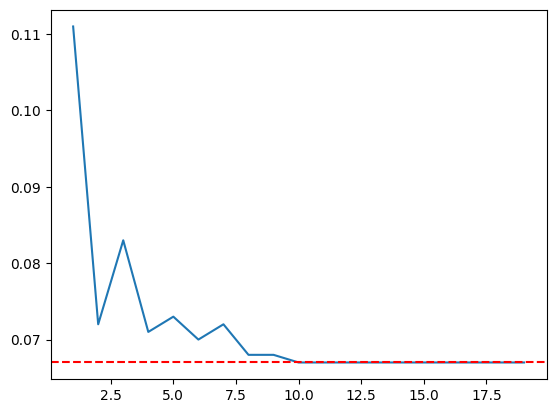

In [429]:
# tuning parameters
A=[]
B=[]
for k in range(1,20):
    scaler.fit(traink_x)
    scaled_feature2= scaler.transform(traink_x)
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(scaled_feature2,traink_y)
    pred_knn2=knn2.predict(testk_x)
    error_rate=np.mean(testk_y!=pred_knn2)
    correct_rate=1-error_rate
    B.append(correct_rate)
    A.append(error_rate)
plt.plot(range(1,20),A);  
plt.axhline(min(A) , color='r', linestyle='dashed')


In [450]:
# comparison to logistic regression
# LogisticRegression from sklearn.linear_model
logit5 = LogisticRegression(C=1e9, solver='liblinear')
# help(LogisticRegression)
logit5.fit(traink_x,traink_y)
pred_logit=logit5.predict_proba(testk_x)
# print(pred_logit)
logit_labels = np.where( pred_logit [: ,1] > 0.25 , 'Yes ', 'No')
# print(type(logit_labels))
# confusion matrix
confusion_matrix_logit5=pd.crosstab(logit_labels,testk_y).T
print(confusion_matrix_logit5)

row_0      No  Yes 
Purchase           
No        913    20
Yes        58     9


In [480]:
# linear and poisson regression
bike = load_data('Bikeshare')
print(bike.columns)
bike.dtypes
feat=bike[['mnth','hr','workingday','temp','weathersit']]
res=bike['bikers']
res.name='bikers'
formula='bikers~'+'+'.join(feat.columns)
# data=pd.DataFrame(feat,res['bikers'])
data
# linerar_model= smf.ols(formula, data=pd.DataFrame(feat,res)).fit()
print(res)


Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'bikers'],
      dtype='object')
0       16
1       40
2       32
3       13
4        1
        ..
8640    92
8641    71
8642    52
8643    38
8644    31
Name: bikers, Length: 8645, dtype: int64
